# Data and Analysis Plan: Predicting Dark Chocolate Rating
## Team 71

- Emily Liu (liu.emily@northeastern.edu)
- Deeraj Mirpuri (mirpuri.d@northeastern.edu)
- Emma Wong (wong.em@northeastern.edu)
- Nikita Vandrangi (vandrangi.n@northeastern.edu)
- Sanay Doshi (doshi.sa@northeastern.edu)



## Executive Summary:

Through our ‘Chocolate Bar Rating’ csv, which compiled a comprehensive review of nearly 2,500 dark chocolate bars, we were able to understand and address questions regarding factors that influence dark chocolate decisions. This information provides a basis for our analysis and allows consumers to narrow down the types of dark chocolate to choose from, which ultimately will help them make informed purchases. From this, the machine learning programs implemented, specifically the decision tree classifier and random forest regressor, help predict the rating of dark chocolate; our feature importance graph helps see which features are most important. 

## Ethical Considerations

Similar to most machine learning algorithms, our algorithms are subject to bias from confounding variables, such as missing data, non-random samples, and general human bias when it comes to dark chocolate reviews and ratings. We suggest that any consumers that utilize our classifier and/or regressor take the results with a grain of salt as it is not 100% accurate and taste can be very subjective. 


## Introduction 

The focus of this project was motivated by the many studies that conclude dark chocolate has many health benefits. It is a great snack for people who crave something sweet but not all the calories and detrimental effects that come along with dessert. However, not all types and brands are created equal. It is difficult for consumers to choose between the many options that are available in the market today, all around the world. 

**The impact of this project is that it will provide insight into how different characteristics of a chocolate bar affect the final product and its quality. Understanding these influences will allow consumers to look for certain qualities in chocolate that they value, such as the origin of the beans or the ingredients used. Machine learning will be used to predict the ratings of chocolate bars based on quantitative characteristics of thousands of dark chocolate bars provided in the data set described below.**


## Data Description:

A dataset from Kaggle.com titled ‘Chocolate Bar Ratings’ compiles the reviews of nearly 2500 dark chocolate bars, as well as relevant data about each one. 

The content of the chocolate bar data set includes the following columns:
- id: number of the review
- manufacturer: name of chocolate manufacturer
- company_location: location of manufacturer
- year_reviewed: the year the review was made
- bean_origin: country of origin of cacao beans
- bar_name: name of chocolate bar
- cocoa_percent: cocoa content of chocolate bar in percentage
- num_ingredients: number of ingredients used in bar
- ingredients: ingredients used
- note: B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, Sa (Salt)
- review: summary of most memorable characteristics of bar
- rating: decimal rating of chocolate bar from 1-5

In [1]:
import pandas as pd
df_chocolate_bars = pd.read_csv("chocolate_bars.csv")
df_chocolate_bars.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


## Data Processing:

As we can see by the dataframe that is produced from this csv, the characteristics that are described for each chocolate are manufacturer, company_location, year_reviewed, bean_origin, bar_name, cocoa_percent, num_ingredients, ingredients and review. Since there are some chocolates that are missing data in the ingredients and number of ingredients columns, it is necessary to drop these rows since our project will focus on the manufacturer, bean_origin, coco_percent and rating columns. 

In [2]:
df_chocolate_bars = df_chocolate_bars.dropna()

Our machine learning algorithms will require numerical data, so data processing must take place since we have a few columns with categorical data: manufacturer, company_location and bean_origin and review. 

For the first three columns mentioned, we created new columns for every unique value in each column. True was put in place if that attribute was true for the given chocolate, and vice versa. 

In [3]:
from copy import copy

# columns w/ categorical variables 
columns = ['manufacturer','company_location', 'bean_origin']

df_choc_clean = copy(df_chocolate_bars)

# for every categorical column create new columns with unique values
for column in columns:
    for item in df_chocolate_bars[column]:
        df_choc_clean['is_'+item] = df_choc_clean[column] == item

/var/folders/jg/bv9nqv613j9_y9nt93p416xr0000gn/T/ipykernel_14172/853383417.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_choc_clean['is_'+item] = df_choc_clean[column] == item
/var/folders/jg/bv9nqv613j9_y9nt93p416xr0000gn/T/ipykernel_14172/853383417.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_choc_clean['is_'+item] = df_choc_clean[column] == item
/var/folders/jg/bv9nqv613j9_y9nt93p416xr0000gn/T/ipykernel_14172/853383417.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [4]:
df_choc_clean.iloc[:, 11:].head()

,is_5150,is_A. Morin,is_Acalli,is_Adi aka Fijiana (Easy In Ltd),is_Aelan,is_Aequare (Gianduja),is_Ah Cacao,is_Akesson's (Pralus),is_Alain Ducasse,is_Alexandre,...,is_Sierra Leone,is_Nigeria,is_Tobago,is_Sumatra,is_Cameroon,is_Samoa,is_China,is_Principe,is_Sulawesi,is_DR Congo
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


For the review column, we treated each review as a list of tags by first using string manipulation to get a list of words in a review. For every list, we created columns in the dataframe for every unique word. Similar to before, True was put in place if the given chocolate’s review contained that word and vice versa. 

In [5]:
from copy import copy

df_choc_reviews = pd.DataFrame()

reviews = df_chocolate_bars.loc[:,'review']

# create list of tags for every review 
for idx in df_chocolate_bars.index:
    
    reviews[idx] = reviews[idx].replace(" ", "")
    reviews[idx] = reviews[idx].split(",")
    
    # for every unique word in review column create a new column
    # True if chocolate has that word in review
    for word in reviews[idx]:
        word = str(word)
        df_choc_reviews.loc[idx,f'review_{word}'] = True
        
df_choc_reviews = df_choc_reviews.fillna(False)

/var/folders/jg/bv9nqv613j9_y9nt93p416xr0000gn/T/ipykernel_14172/3461244661.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews[idx] = reviews[idx].split(",")
/var/folders/jg/bv9nqv613j9_y9nt93p416xr0000gn/T/ipykernel_14172/3461244661.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews[idx] = reviews[idx].replace(" ", "")
/var/folders/jg/bv9nqv613j9_y9nt93p416xr0000gn/T/ipykernel_14172/3461244661.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [6]:
df_choc_reviews.head()

,review_richcocoa,review_fatty,review_bready,review_cocoa,review_vegetal,review_savory,review_blackberry,review_fullbody,review_chewy,review_off,...,review_mellowchoco,review_burntcocoa,review_lightrum,review_intensepruneandberry,review_masculine,review_hintofsmoke,review_intenseblueberry,review_Cadburyegg,review_strongnutty,review_mildnuts
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# merge both dataframes to create df w/ categorical variables converted to dummies 
df_choc_clean = pd.concat([df_choc_clean,df_choc_reviews], axis = 1)
df_choc_clean.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,...,review_mellowchoco,review_burntcocoa,review_lightrum,review_intensepruneandberry,review_masculine,review_hintofsmoke,review_intenseblueberry,review_Cadburyegg,review_strongnutty,review_mildnuts
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",...,False,False,False,False,False,False,False,False,False,False
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",...,False,False,False,False,False,False,False,False,False,False
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",...,False,False,False,False,False,False,False,False,False,False
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",...,False,False,False,False,False,False,False,False,False,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",...,False,False,False,False,False,False,False,False,False,False


In [8]:
# converted to csv file
df_choc_clean.to_csv('df_choc_clean.csv')

## Method:

### Decision Tree Classifier

The first of two machine learning methods we decided to use was a Decision Tree Classifier. An explanation of what a Decision Tree Classifier is and its use can be found here. Since the goal of our project was to predict the quality of a chocolate, which was put into categorical buckets, based on its characteristics, it was determined this method was appropriate based on our desired results. We used the processed data set with the manufacturer, bean_origin, company_location, review columns converted to dummy variables to predict which rating bucket an unknown chocolate would fall into as a measure of quality. The reason a classifier was chosen over a regressor was due to the insignificance of a specific rating versus a range for a consumer who may use the model. In a practical example, a consumer would not care if a chocolate had a rating of exactly 3.86 to determine if a chocolate is good. It would be more impactful to separate the ratings into buckets to classify a grouping of chocolates ranging from terrible to delicious. 
    
One assumption of this method that is being made is that a max_depth of 5 is a reasonable value to build the model. There is a possibility that a greater depth may be more accurate or effective, but for the purpose of this project, five was chosen for greatest visual impact while maintaining simplicity. Additionally, there is a level of bias and subjectivity through the use of this model. The intervals and number of buckets chosen were arbitrarily made based on what was thought to be reasonable, but smaller or larger ranges could potentially result in a better model if further analyzed. Another aspect of subjectivity is that it is unknown from where the ratings come from. It could be possible that if from a different source or a larger sample, the model could change as well.

In [9]:
df_choc = pd.read_csv("df_choc_clean.csv")

In [10]:
from copy import copy

df_choc_a = copy(df_choc)

# dropped non-numerical columns for ml purposes
df_choc_a = df_choc_a.drop(['Unnamed: 0', 'id','year_reviewed','bar_name','ingredients','manufacturer','company_location','bean_origin','review'], axis = 1)
df_choc_a.head()

,cocoa_percent,num_ingredients,rating,is_5150,is_A. Morin,is_Acalli,is_Adi aka Fijiana (Easy In Ltd),is_Aelan,is_Aequare (Gianduja),is_Ah Cacao,...,review_mellowchoco,review_burntcocoa,review_lightrum,review_intensepruneandberry,review_masculine,review_hintofsmoke,review_intenseblueberry,review_Cadburyegg,review_strongnutty,review_mildnuts
0,76.0,3.0,3.25,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,76.0,3.0,3.50,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,76.0,3.0,3.75,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,3.0,3.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,72.0,3.0,3.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
ratings = df_choc.loc[:,'rating'].values
ratings

# create rating buckets 
for idx in range(len(ratings)):
    if ratings[idx] >= 4:
        df_choc.loc[idx,'rate_bucket'] = '>= 4'
    elif ratings[idx] >= 3.5:
        df_choc.loc[idx,'rate_bucket'] = '3.5 <= x < 4'
    elif ratings[idx] >= 3:
        df_choc.loc[idx,'rate_bucket'] = '3 <= x < 3.5'
    elif ratings[idx] >= 2.5:
        df_choc.loc[idx,'rate_bucket'] = '2.5 <= x < 3'
    elif ratings[idx] >= 2:
        df_choc.loc[idx,'rate_bucket'] = '2 <= x < 2.5'
    else:
        df_choc.loc[idx,'rate_bucket'] = '< 2'

In [12]:
# x feature list for ml (all numerical columns without the target column)
x_feat_list = df_choc_a.columns.values.tolist()
x_feat_list.remove('rating')

### Random Forest Regressor 

The second of the two machine learning methods we decided to use was a Random Forest Regressor. An explanation of what a Random Forest Regressor is and its use can be found here. Since the goal of our project was to predict the quality of a chocolate based on its characteristics, it was determined this method was appropriate based on our desired results. We used the processed data set with the manufacturer, bean_origin, company_location, review columns converted to dummy variables to predict what the rating of  an unknown chocolate would be. We chose a random forest regressor model because we wanted to predict chocolate ratings, which is continuous data, based on their characteristics and columns mentioned above. Our machine learning involves taking these features and predicting the final rating.


## Results:

### Decision Tree Classifier

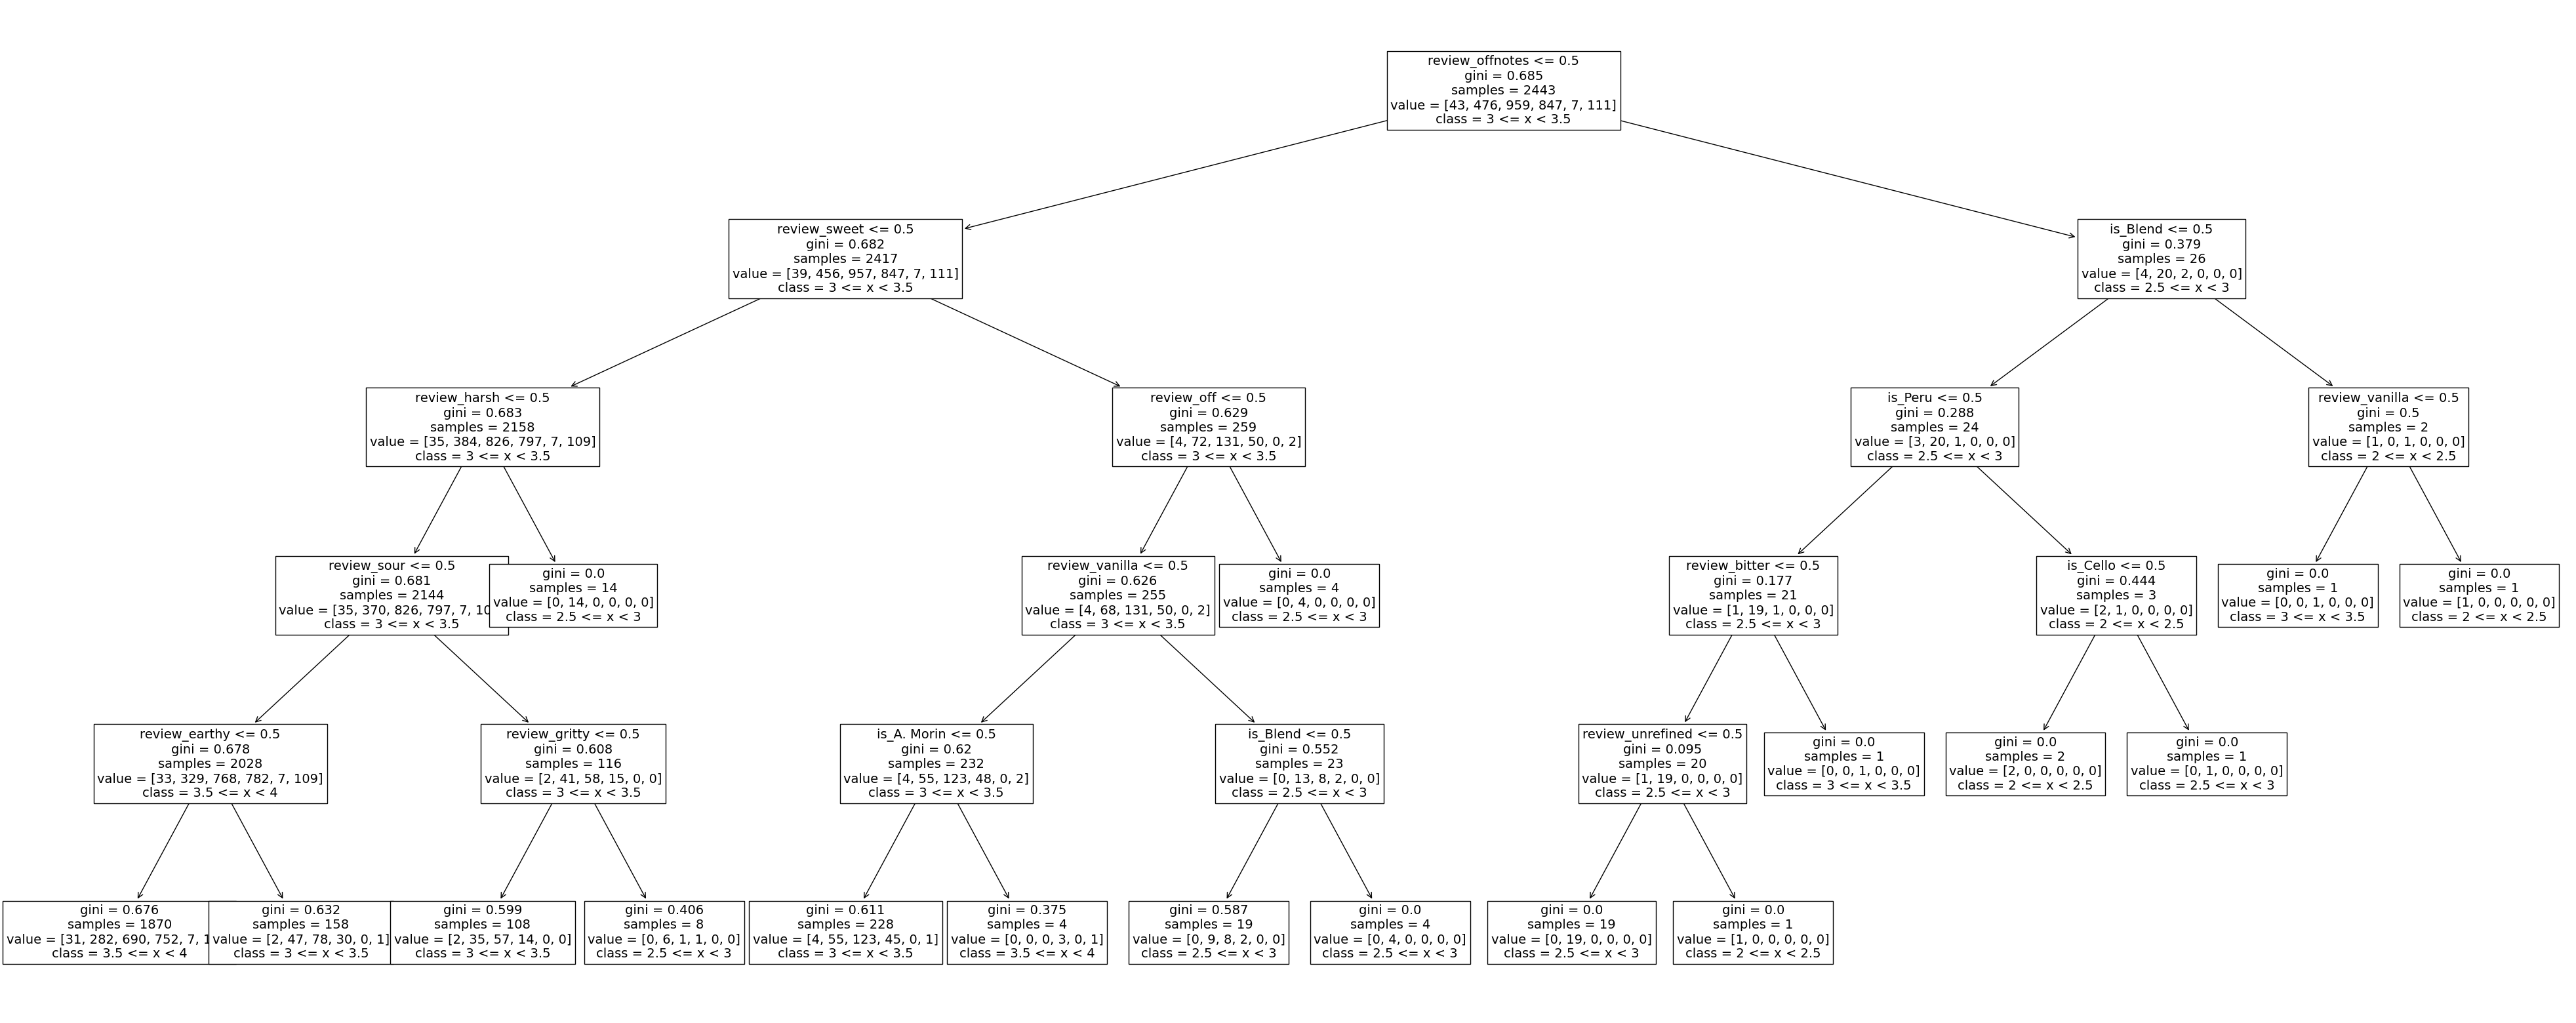

In [13]:
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

max_depth = 5

x_feat_list

# extract data from dataframe
x = df_choc.loc[:, x_feat_list].values
y = df_choc.loc[:, 'rate_bucket'].values

# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)

# plot figure of decision tree
# initialize empty figure (plot_tree sets text size to fill given figure
# if we resize figure afterwards text size remains too small)
plt.figure()
plt.gcf().set_size_inches(50, 20)

# 'plot' decision tree
tree.plot_tree(dec_tree_clf, feature_names=x_feat_list, class_names = dec_tree_clf.classes_, fontsize = 14) ;

# save figure to png
plt.savefig('tree.png')

The above decision tree is the result of the Classifier model we fit to our data to predict which rating bucket an unknown chocolate bar would fall into. At each branching point, the decision determines which rating bucket would be most likely at that level. The most common features in the decision tree are if a word is present or not in its review column, but there are also other features from bean_origin and manufacturer throughout the tree. At the ends of the branches, it is predicted which rating bucket a chocolate would most likely be after following a path from the top.

### Random Forest Regression

In [14]:
from copy import copy
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Gets the x features we want to train our value on to get target values
x = df_choc_a.loc[:,x_feat_list].values
y = df_choc_a.loc[:, 'rating'].values

for feat in x_feat_list:
    df_choc_a[feat] = df_choc_a[feat] / df_choc_a[feat].std()

# initialize a Rf_regressor
Rf_regressor = RandomForestRegressor()

# construction of kfold object
kfold = KFold(n_splits=10, shuffle=True)

# allocate an empty array to store predictions in
y_pred = copy(y)

for train_idx, test_idx in kfold.split(x, y):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y[train_idx]
    
    # fit happens "inplace", we modify the internal state of rf_regressor to remember all the training samples
    Rf_regressor.fit(x_train, y_true_train)

    # estimate each chocolates rating
    y_pred[test_idx] = Rf_regressor.predict(x_test)


In [15]:
print(r2_score(y,y_pred))

0.32411133827207117


The variability of the dark chocolate ratings can be explained by the predicting features 32.4% of the time.  

In [16]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return dict(islice(iterable, n))

In [17]:
def get_feat_import(feat_list, feat_import, sort=True, limit=None):
    import operator
    import numpy as np
    """Returns a dictionary that provides the top 10 most important features as well as how much these 
    features attribute to the ratings
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value 
    Retunrs:
        n_items(dict): Top 10 Features and percentage importance of these features in predicting rating
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
        # limit to the first limit feature
    feat_list = feat_list[:limit]
    feat_import = feat_import[:limit]
    dictionary = dict(zip(feat_list, feat_import))
    sorted_d = dict(sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True))
    n_items = take(10, sorted_d.items())
    return(n_items)

In [18]:
# extract data
x_feat_list 
y_feat = 'rating'
x = df_choc_a.loc[:, x_feat_list].values
y = df_choc_a.loc[:, y_feat].values

# initialize classifier
rf_reg = RandomForestRegressor()

# train classifier
rf_reg.fit(x, y)

# plot feature importance
Feature_Importance = get_feat_import(feat_list=x_feat_list, feat_import=rf_reg.feature_importances_)

In [19]:
#Gets feature importance reversed importance from least important to most important
import operator
Feature_Importance = dict( sorted(Feature_Importance.items(), key=operator.itemgetter(1),reverse= False))

Text(0.5, 1.0, 'Feature and its Importance')

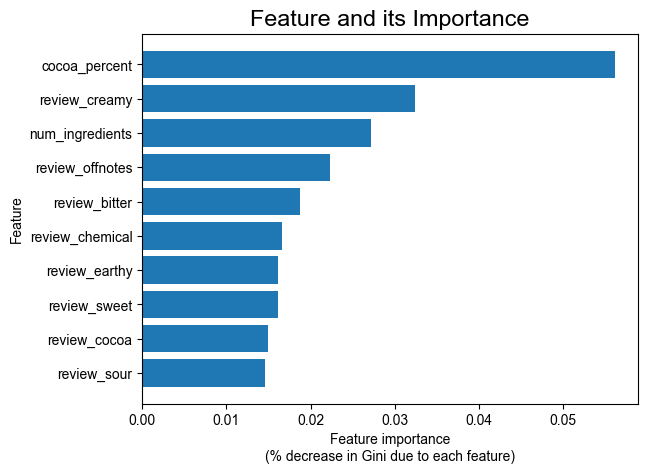

In [20]:
#Iterates through list of features and puts them in a list
list_of_features = []
for x in Feature_Importance.keys():
    list_of_features.append(x)
plt.barh(list_of_features,Feature_Importance.values())
sns.set(font_scale=1.4)
plt.xlabel('Feature importance\n(% decrease in Gini due to each feature)')
plt.ylabel('Feature')
plt.title('Feature and its Importance')

After plotting our Random Forest Regression we wanted to see what were the key factors that helped predict our final chocolate rating and we plotted the top 10 values and interestingly some reviews helped determine the rating of a chocolate more and cocoa percentage was the biggest factor in predicting chocolate ratings.

## Discussion

Our initial problem statement targeted individuals who may have a difficult time choosing between the various available dark chocolate options. We approached this by implementing two different kinds of machine learning methods: the decision tree classifier and random forest regressor. Both of these are models designed to predict the rating of a certain kind of dark chocolate, which would help individuals in gauging the quality of the dark chocolate.

The decision tree classifer and the feature importance graph were both tools used to direct individuals in finding good dark chocolate. The graph produced specifically shows that cocoa percent is an attribute to look for. 

Because individuals will be relying on these models to inform their dark chocolate decisions, it’s imperative to identify any possible flaws that can be fixed in a further rendition of this project. The Random Forest Regressor only had an R2 score of 32.4%, which is on the lower end. The high amount of features also made it difficult to predict the dark chocolate ratings, which led to the Gini scores in the Decision Tree Classifier to be higher than we would like.

One key aspect is the ratings, which can be very subjective. In this case, we don’t exactly know where or how these ratings were determined, i.e. with what standards or expectations. Additionally, the ratings also come from a single source. It would be interesting to see how these models are impacted with an entirely different set of ratings or even multiple ratings per dark chocolate type. 

In conclusion, our model is a step in the right direction for better dark chocolate decisions, which can be furthered with more detailed data and more intricate analysis. 